In [1]:
#Importing packages
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from sklearn.decomposition import PCA

from salishsea_tools import viz_tools

In [2]:
#Importing the dataset with 4 years
phys = xr.open_dataset('/ocean/cstang/SalishSeaCast_daily_salinity_test_full_2_20180101_20220101.nc')
data = np.array(phys.vosaline)
t1 = np.array(data[0][0])
t2 = data[1][0]
avgt = np.zeros_like(t1)
print(avgt)

phys

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<xarray.Dataset>
Dimensions:   (time: 1462, depth: 4, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2018-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 58.48 76.59 98.06 121.9
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast_daily_salinity_test_full_2_20180101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-23 08:59 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

<xarray.Dataset>
Dimensions:   (time: 1462, depth: 4, gridY: 898, gridX: 398)
Coordinates:
  * time      (time) datetime64[ns] 2018-01-01T12:00:00 ... 2022-01-01T12:00:00
  * depth     (depth) float32 58.48 76.59 98.06 121.9
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    vosaline  (time, depth, gridY, gridX) float32 nan nan nan ... nan nan nan
Attributes:
    name:         SalishSeaCast_daily_salinity_test_full_2_20180101_20220101
    description:  Daily extracted from SalishSeaCast v201905 hindcast
    history:      2022-11-23 08:59 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

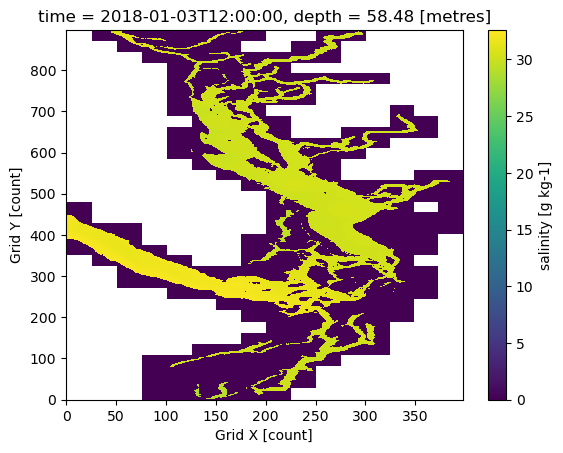

In [3]:
phys.vosaline[2, 0].plot();
phys

In [4]:
#Importing data and getting rid of the 4th dimension (which is just 1 depth)

data = Dataset('/ocean/cstang/SalishSeaCast_daily_salinity_test_full_2_20180101_20220101.nc')
Salinity = data.variables['vosaline']
Sal_dep = Salinity[:,1,:,:]
Sal_d50 = Salinity[:,0,:,:]
Sal_d90 = Salinity[:,2,:,:]
print(Sal_dep.shape)

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

info = np.ma.masked_array(phys.vosaline[0, 0], mask=tmask[0])
info2 = np.ma.masked_array(phys.vosaline[90, 0], mask=tmask[0])
info3 = np.ma.masked_array(phys.vosaline[180, 0], mask=tmask[0])
info4 = np.ma.masked_array(phys.vosaline[260, 0], mask=tmask[0])

for i in range(len(info[:,0])):
    for j in range(len(info[0,:])):
        if info[i,j] == 0:
            info[i,j] = np.nan
        if info2[i,j] == 0:
            info2[i,j] = np.nan
        if info3[i,j] == 0:
            info3[i,j] = np.nan
        if info4[i,j] == 0:
            info4[i,j] = np.nan
        

(1462, 898, 398)


In [5]:
print(np.shape(Sal_dep)[1])
print(np.shape(Sal_dep)[2])
print(np.shape(Sal_dep)[0])
print(Sal_dep.shape)

898
398
1462
(1462, 898, 398)


Text(0.5, 1.0, 'September 18th 2021')

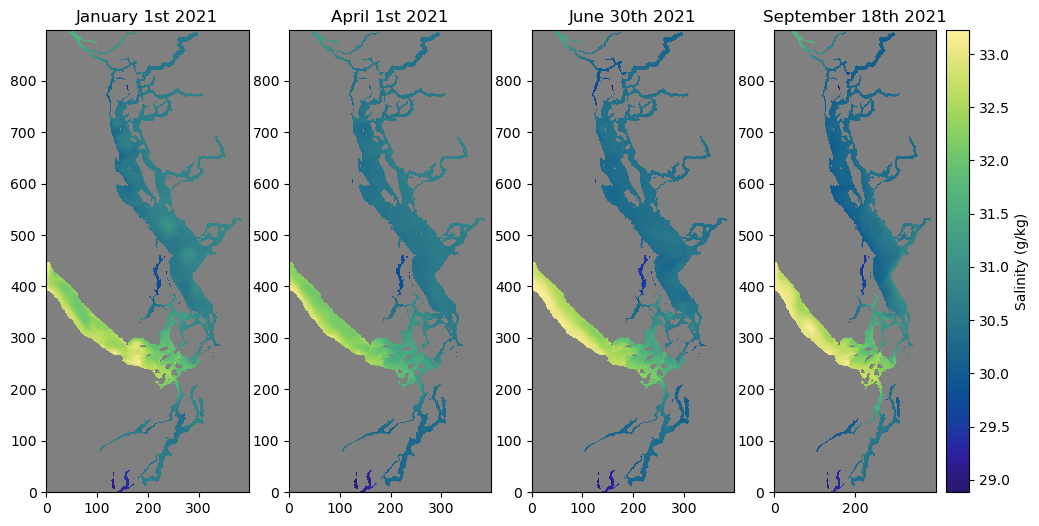

In [6]:
#Plotting data in different seasons

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 4, figsize=(12, 6))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax[0].pcolormesh(info, cmap=cmap)
colours = ax[1].pcolormesh(info2, cmap=cmap)
ax[0].set_title('January 1st 2021')
colours = ax[2].pcolormesh(info3, cmap=cmap)
colours = ax[3].pcolormesh(info4, cmap=cmap)
cb = fig.colorbar(colours, ax=ax[3])
cb.set_label('Salinity (g/kg)')
ax[1].set_title('April 1st 2021')
ax[2].set_title('June 30th 2021')
ax[3].set_title('September 18th 2021')


In [7]:
#reformat data from 3D to 2D, where rows are grid points, columns are days
#Reformat 77 m depth
sal_70 = np.empty((np.shape(Sal_dep)[1]*np.shape(Sal_dep)[2],np.shape(Sal_dep)[0]))
for ii in range(np.shape(Sal_dep)[0]):
    sal_70[:,ii] = np.reshape(Sal_dep[ii],(np.shape(Sal_dep)[1]*np.shape(Sal_dep)[2]))
    
print(sal_70)

#Reformat 58 m depth
sal_50 = np.empty((np.shape(Sal_d50)[1]*np.shape(Sal_d50)[2],np.shape(Sal_d50)[0]))
for ii in range(np.shape(Sal_d50)[0]):
    sal_50[:,ii] = np.reshape(Sal_d50[ii],(np.shape(Sal_d50)[1]*np.shape(Sal_d50)[2]))

#Reformat 92 m depth
sal_90 = np.empty((np.shape(Sal_d90)[1]*np.shape(Sal_d90)[2],np.shape(Sal_d90)[0]))
for ii in range(np.shape(Sal_d90)[0]):
    sal_90[:,ii] = np.reshape(Sal_d90[ii],(np.shape(Sal_d90)[1]*np.shape(Sal_d90)[2]))


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [8]:
#Messing around
print(Sal_dep.shape)

hh = np.where(~np.isnan(sal_70))
rr = hh[0]
cc = hh[1]
print(rr.shape)

sal_70[rr[0],cc[0]]


(1462, 898, 398)
(266762016,)


0.0

In [9]:
#Messing around
print(Sal_dep.shape)

hh = np.where(~np.isnan(Sal_dep[9,:,:]))
rr = hh[0]
cc = hh[1]
print(rr)
print(cc)
print(rr.shape)

sal_70[rr[0],cc[0]]


(1462, 898, 398)
[  0   0   0 ... 897 897 897]
[ 76  77  78 ... 298 299 300]
(182442,)


nan

In [10]:
#Try making the nan's 0

sal_70[np.isnan(sal_70)] = 0
sal_50[np.isnan(sal_50)] = 0
sal_90[np.isnan(sal_90)] = 0
sal_70.shape

(357404, 1462)

# 70m Depth

In [11]:
#Performing PCA at 77m depth for all 4 years
pca_input_S = sal_70.T
n_modes_S = np.min(np.shape(sal_70))
pca_S = PCA(n_components = n_modes_S)
PCs_S = pca_S.fit_transform(pca_input_S)
eigvecs_S = pca_S.components_
fracVar_S = pca_S.explained_variance_ratio_

0.03986486106363191


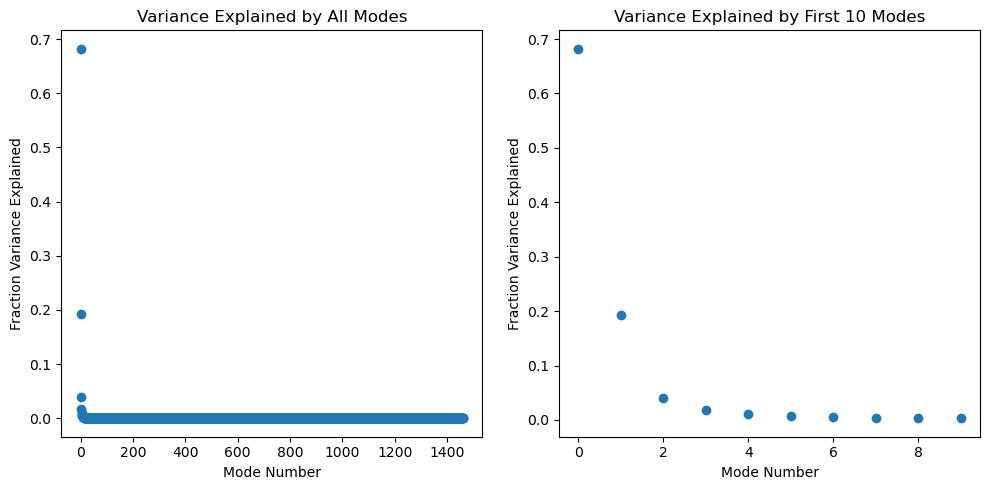

0.914134096719285
[6.82061677e-01 1.92207558e-01 3.98648611e-02 ... 2.76888735e-07
 2.71507140e-07 1.56309152e-29]


In [12]:
#plot fraction of variance explained by each mode

print(fracVar_S[2])
n_modes_show = 10

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar_S)),fracVar_S)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar_S[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

print(sum(fracVar_S[0:3]))
print(fracVar_S)

(1462, 357404)


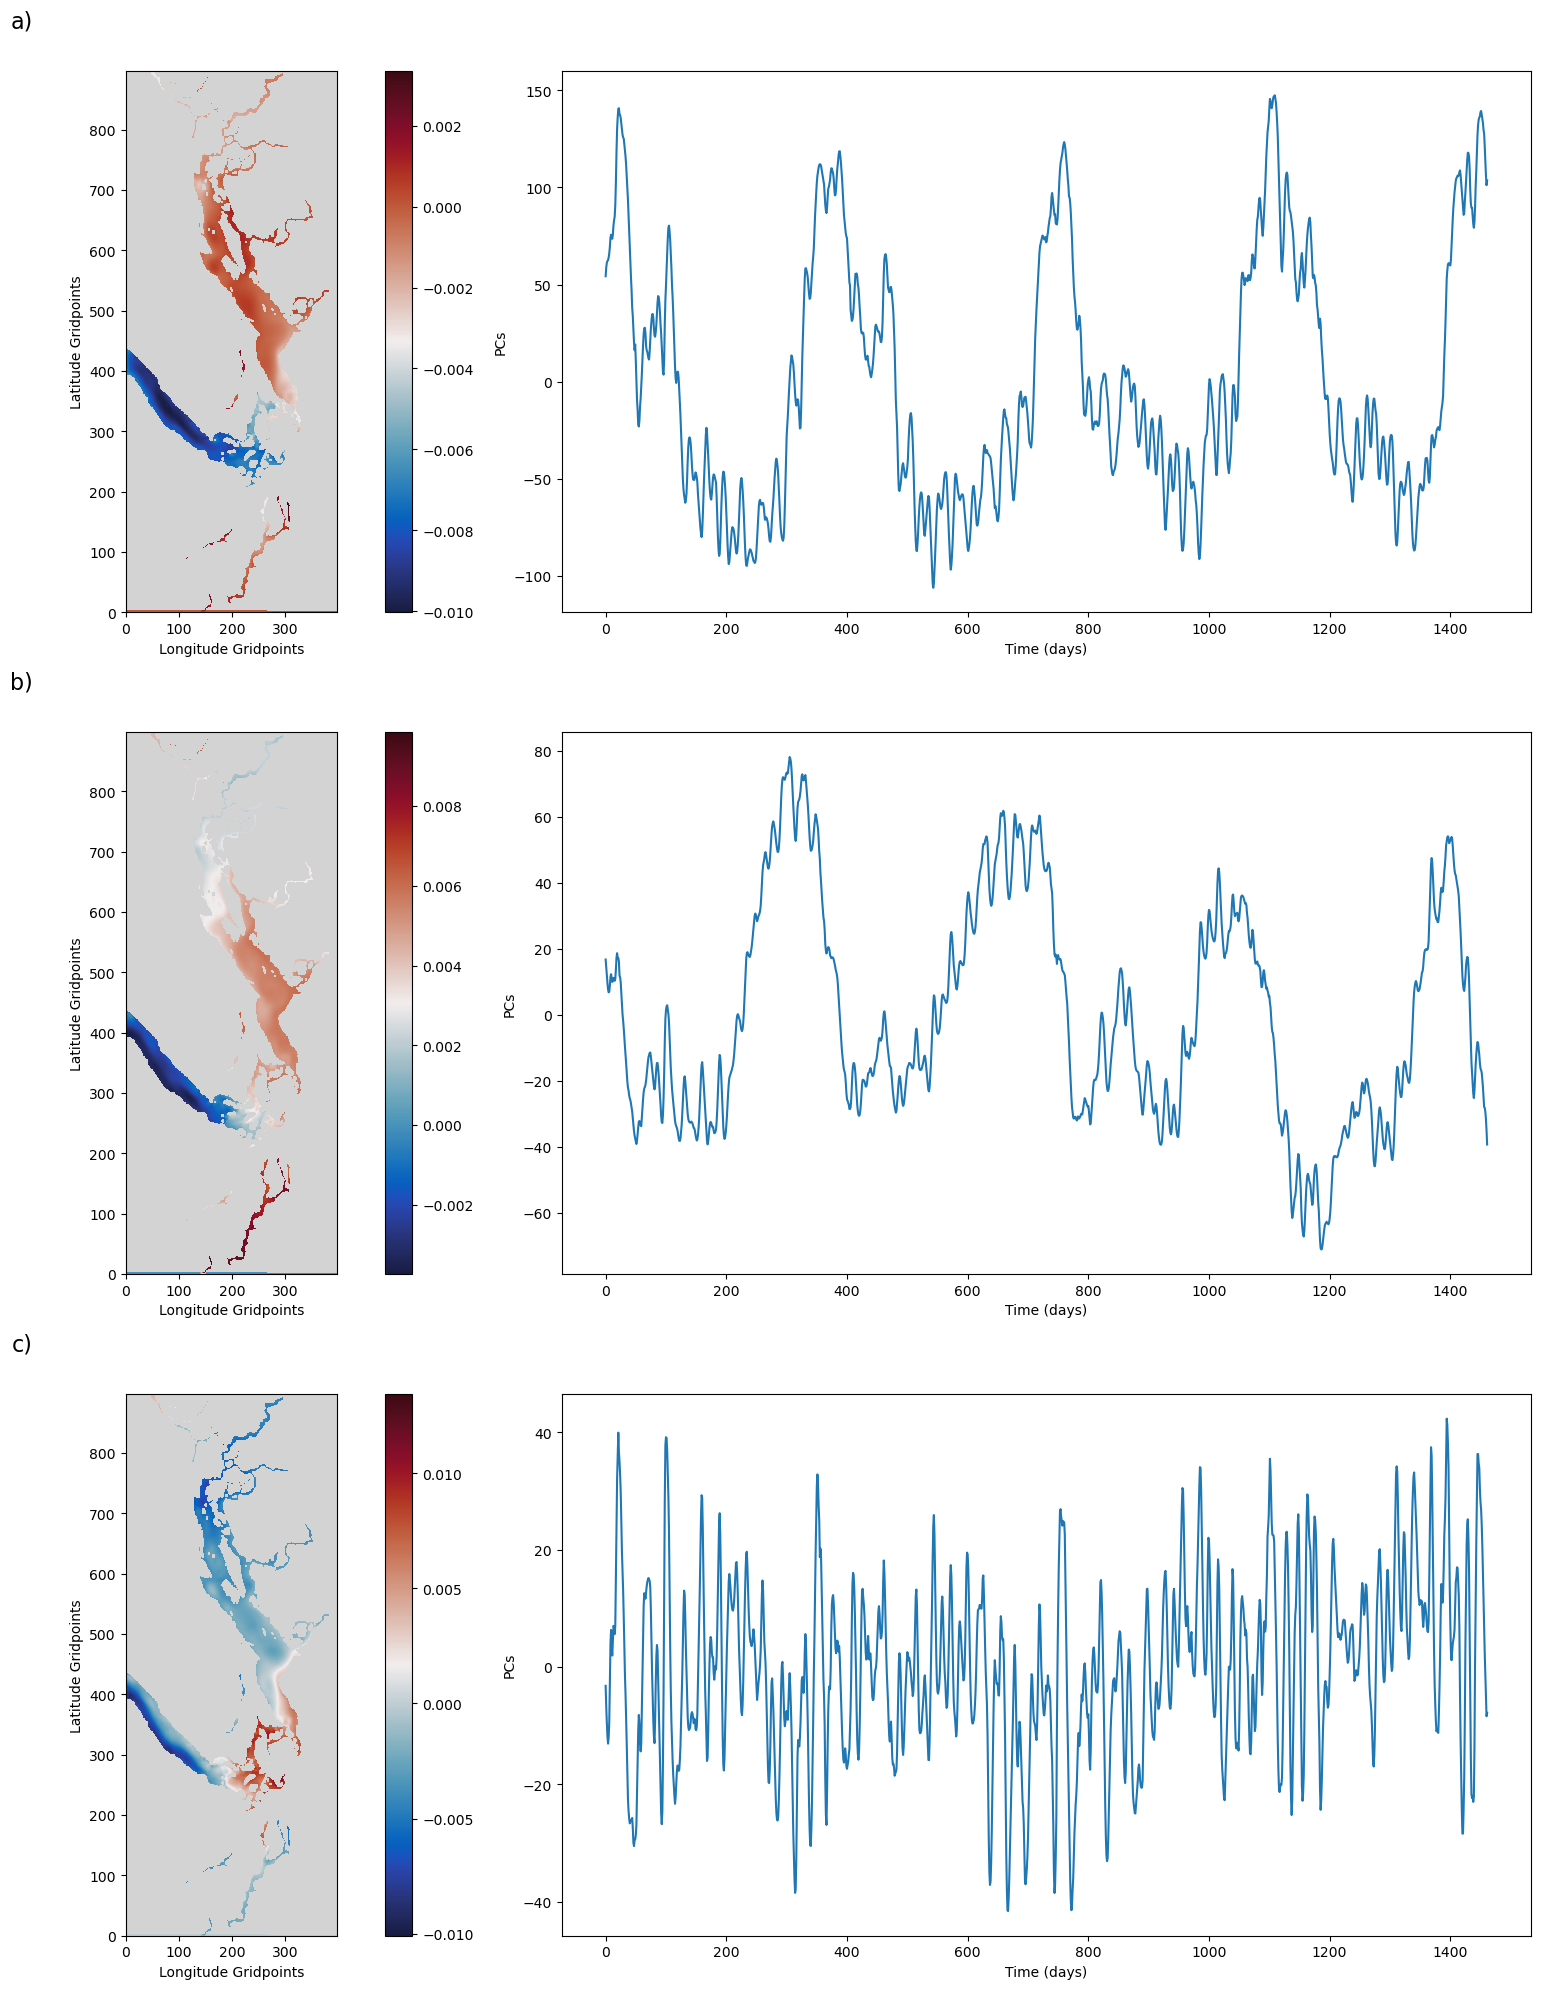

In [28]:
#plot the first 3 modes at 77 m depth for 4 years
eigvecs_S[eigvecs_S==0] = np.nan

n = 3
T_extent=[0,398,0,898]

fig,ax = plt.subplots(3,2,figsize=(20,20))
print(eigvecs_S.shape)
cmap = cm.balance
cmap.set_bad('lightgray')
label = ['a)','b)','c)']


for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    cb = ax[kk,0].imshow(np.flipud(np.reshape(eigvecs_S[kk,:],(898,398))),extent=T_extent,cmap = cmap,aspect='auto')
    #plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar(cb)
    ax[kk,0].set_xlabel('Longitude Gridpoints')
    ax[kk,0].set_ylabel('Latitude Gridpoints')
    viz_tools.set_aspect(ax[kk,0]);
    ax[kk,0].text(-175, 1000, label[kk],fontsize=16, fontweight='normal', va='top', ha='right')
    
    plt.subplot(n,2,(kk+1)*2)
    ax[kk,1].plot(PCs_S[:,kk])
    ax[kk,1].set_xlabel('Time (days)')
    ax[kk,1].set_ylabel('PCs')
    #plt.title('PCs of Mode #' + str(kk+1))
    
    plt.tight_layout()

# 50m Depth

In [18]:
#Perform PCA on 4 years at 58 m depth

pca_input_50 = sal_50.T
n_modes_50 = np.min(np.shape(sal_50))
pca_50 = PCA(n_components = n_modes_50)
PCs_50 = pca_50.fit_transform(pca_input_50)
eigvecs_50 = pca_50.components_
fracVar_50 = pca_50.explained_variance_ratio_

0.03986486106363191


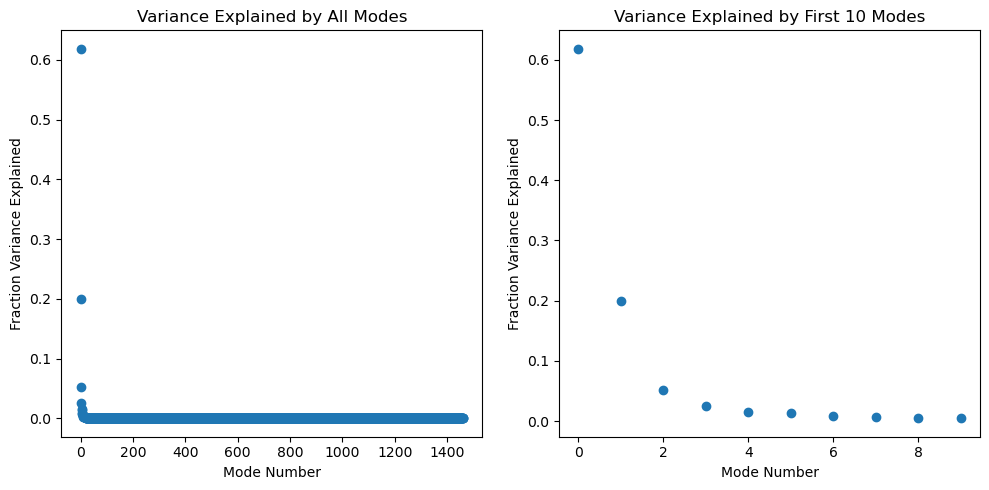

0.8695750424672058


In [19]:
#plot fraction of variance explained by each mode

print(fracVar_S[2])
n_modes_show = 10

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar_50)),fracVar_50)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar_50[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

print(sum(fracVar_50[0:3]))


(1462, 357404)


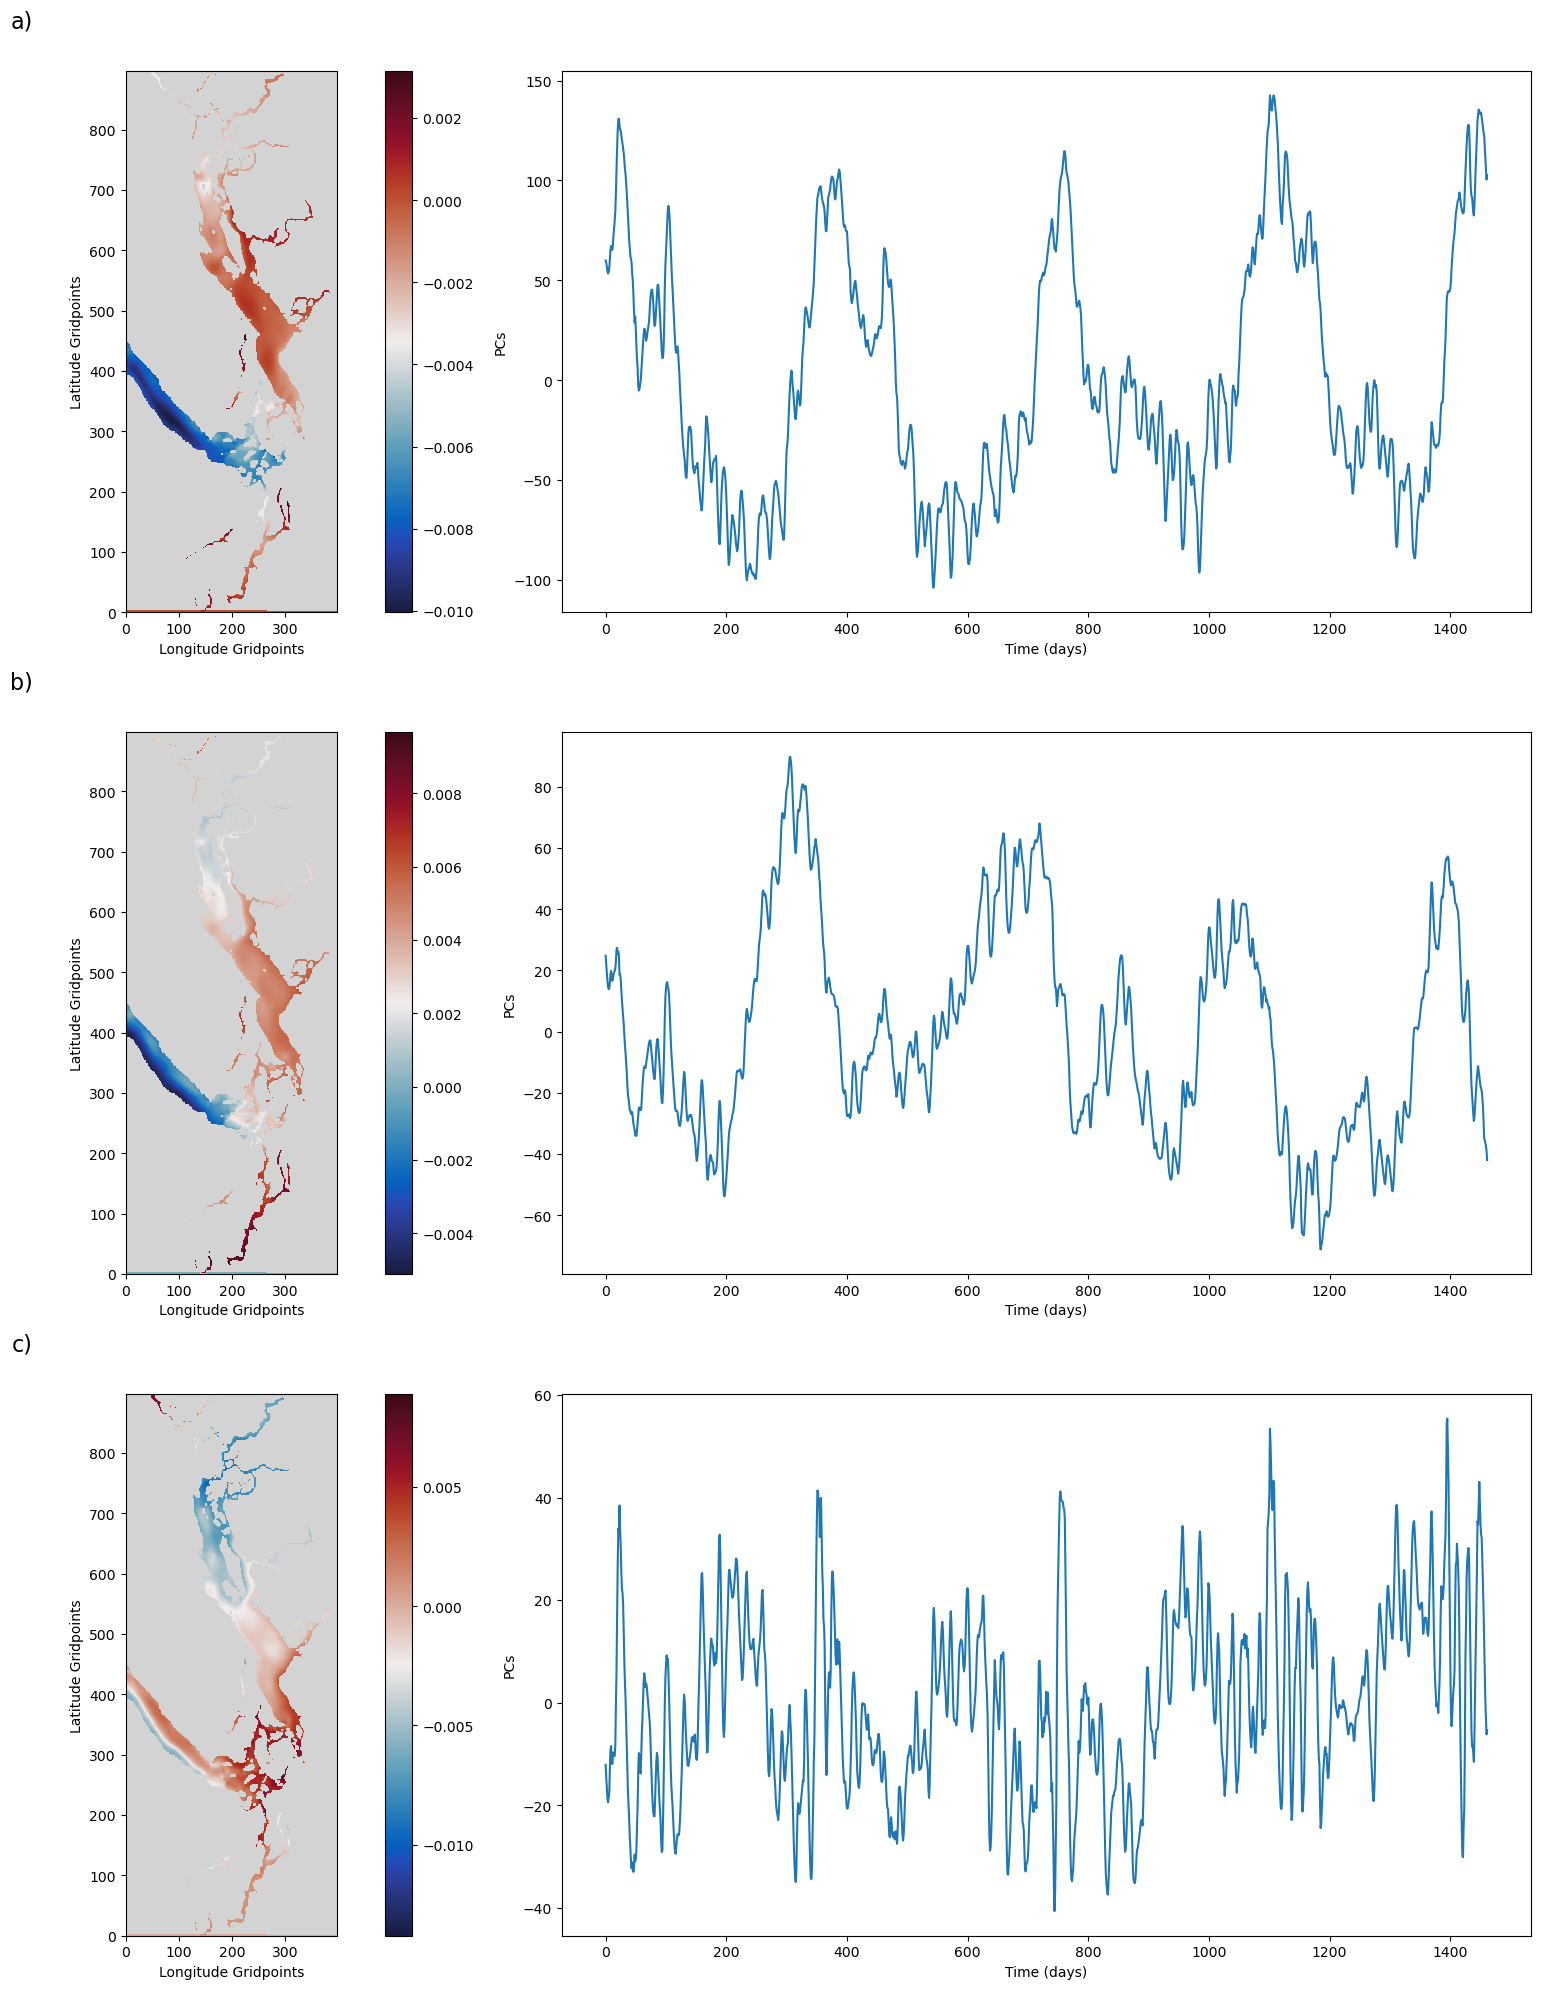

In [24]:
#plot the first 3 modes at 58 m depth for 4 years
eigvecs_50[eigvecs_50==0] = np.nan

n = 3
T_extent=[0,398,0,898]

fig,ax = plt.subplots(3,2,figsize=(20,20))
print(eigvecs_50.shape)
cmap = cm.balance
cmap.set_bad('lightgray')
label = ['a)','b)','c)']


for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    cb = ax[kk,0].imshow(np.flipud(np.reshape(eigvecs_50[kk,:],(898,398))),extent=T_extent,cmap = cmap,aspect='auto')
    #plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar(cb)
    ax[kk,0].set_xlabel('Longitude Gridpoints')
    ax[kk,0].set_ylabel('Latitude Gridpoints')
    viz_tools.set_aspect(ax[kk,0]);
    ax[kk,0].text(-175, 1000, label[kk],fontsize=16, fontweight='normal', va='top', ha='right')
    
    plt.subplot(n,2,(kk+1)*2)
    ax[kk,1].plot(PCs_50[:,kk])
    ax[kk,1].set_xlabel('Time (days)')
    ax[kk,1].set_ylabel('PCs')
    #plt.title('PCs of Mode #' + str(kk+1))
    
    plt.tight_layout()

# 90 m Depth

In [21]:
#Performing PCA on 4 years at 92 m depth

pca_input_90 = sal_90.T
n_modes_90 = np.min(np.shape(sal_90))
pca_90 = PCA(n_components = n_modes_90)
PCs_90 = pca_90.fit_transform(pca_input_90)
eigvecs_90 = pca_90.components_
fracVar_90 = pca_90.explained_variance_ratio_

0.03986486106363191


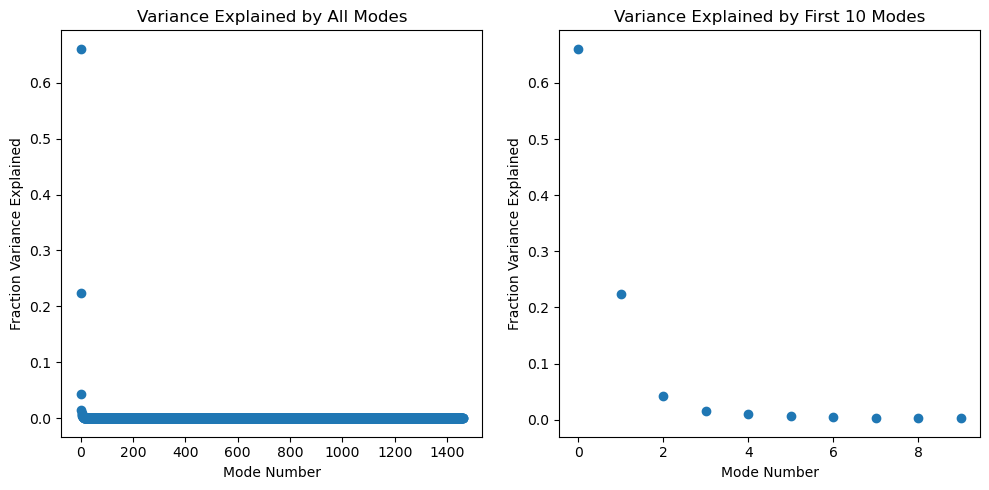

0.9282119551839587


In [25]:
#plot fraction of variance explained by each mode

print(fracVar_S[2])
n_modes_show = 10

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar_90)),fracVar_90)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar_90[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

print(sum(fracVar_90[0:3]))

(1462, 357404)


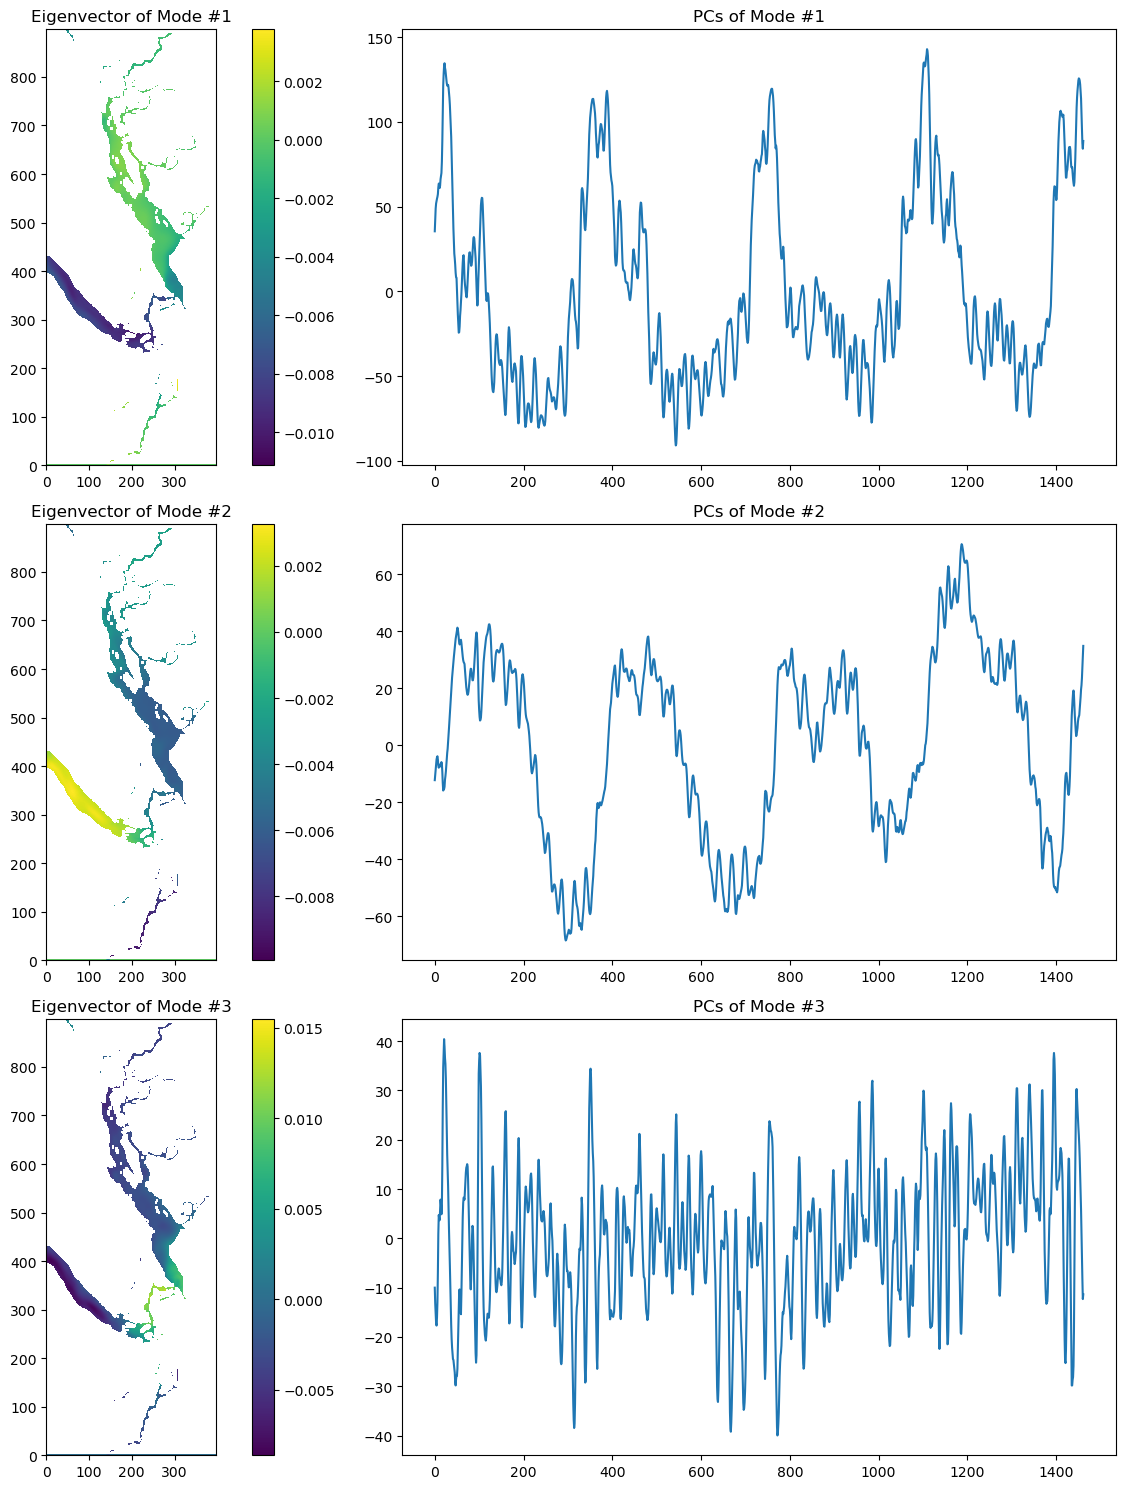

In [26]:
#Set 0's back to nan for plotting
eigvecs_90[eigvecs_90==0] = np.nan

n = 3
T_extent=[0,398,0,898]

fig,ax = plt.subplots(3,2,figsize=(15,5*n))
print(eigvecs_90.shape)


for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    cb = ax[kk,0].imshow(np.flipud(np.reshape(eigvecs_90[kk,:],(898,398))),extent=T_extent,cmap = 'viridis',aspect='auto')
    # plt.plot(coastLon,coastLat,c='k')
    # plt.xlim(T_extent[:2])
    # plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.colorbar(cb)
    viz_tools.set_aspect(ax[kk,0]);
    
    plt.subplot(n,2,(kk+1)*2)
    ax[kk,1].plot(PCs_90[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    # plt.xlabel('Glacier')
    
    plt.tight_layout()

Text(0.5, 0.01, 'Longitude Gridpoints')

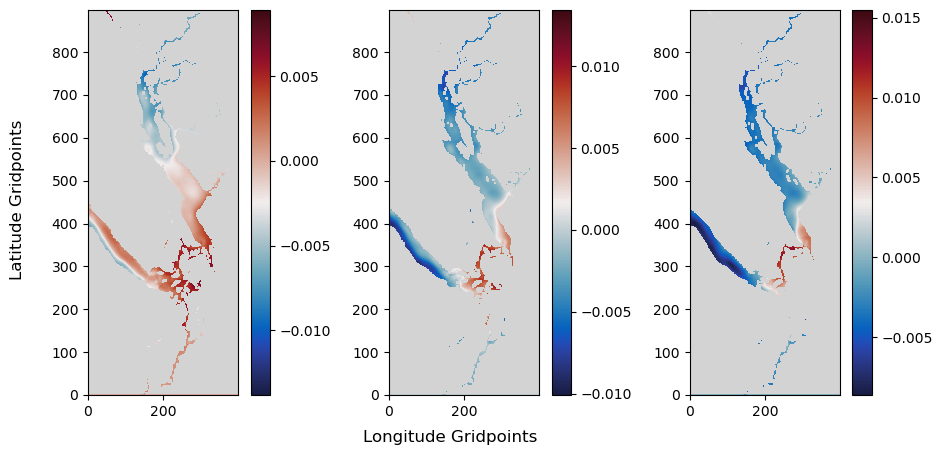

In [27]:
#Plotting 3rd eigenvector at various depths

fig,ax = plt.subplots(1,3,figsize=(11,5))
cmap = cm.balance
cmap.set_bad('lightgray')
cb = ax[0].imshow(np.flipud(np.reshape(eigvecs_50[2,:],(898,398))),extent=T_extent,cmap = cmap,aspect='auto')
plt.colorbar(cb)
viz_tools.set_aspect(ax[0]);
#ax[0].set_title('58 m Depth')
cb = ax[1].imshow(np.flipud(np.reshape(eigvecs_S[2,:],(898,398))),extent=T_extent,cmap = cmap,aspect='auto')
plt.colorbar(cb)
#ax[1].set_title('77 m Depth')
viz_tools.set_aspect(ax[1]);
cb = ax[2].imshow(np.flipud(np.reshape(eigvecs_90[2,:],(898,398))),extent=T_extent,cmap = cmap,aspect='auto')
#plt.suptitle('Eigenvector of Mode #' + str(2+1)+ ' at Various Depths')
plt.colorbar(cb)
#ax[2].set_title('92 m Depth')
viz_tools.set_aspect(ax[2]);
fig.supylabel('Latitude Gridpoints', x=0.1)
fig.supxlabel('Longitude Gridpoints')